# Import Library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [29]:
data = pd.read_csv('hotel_bookings.csv')

# Exploratory Analysis and data cleaning


In [30]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [31]:
data.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [32]:
data.shape

(119390, 32)

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [34]:
for col in data.describe(include='object').columns:
    display("COL_NAME -> ", col)
    display("UNIQUE_VALUES -> ", data[col].unique())
    display('----------------------------------------------------------------------------------------------------')

'COL_NAME -> '

'hotel'

'UNIQUE_VALUES -> '

array(['Resort Hotel', 'City Hotel'], dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'arrival_date_month'

'UNIQUE_VALUES -> '

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'meal'

'UNIQUE_VALUES -> '

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'country'

'UNIQUE_VALUES -> '

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'market_segment'

'UNIQUE_VALUES -> '

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'distribution_channel'

'UNIQUE_VALUES -> '

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'reserved_room_type'

'UNIQUE_VALUES -> '

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'assigned_room_type'

'UNIQUE_VALUES -> '

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'deposit_type'

'UNIQUE_VALUES -> '

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'customer_type'

'UNIQUE_VALUES -> '

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'reservation_status'

'UNIQUE_VALUES -> '

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

'----------------------------------------------------------------------------------------------------'

'COL_NAME -> '

'reservation_status_date'

'UNIQUE_VALUES -> '

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

'----------------------------------------------------------------------------------------------------'

In [35]:
data.size

3820480

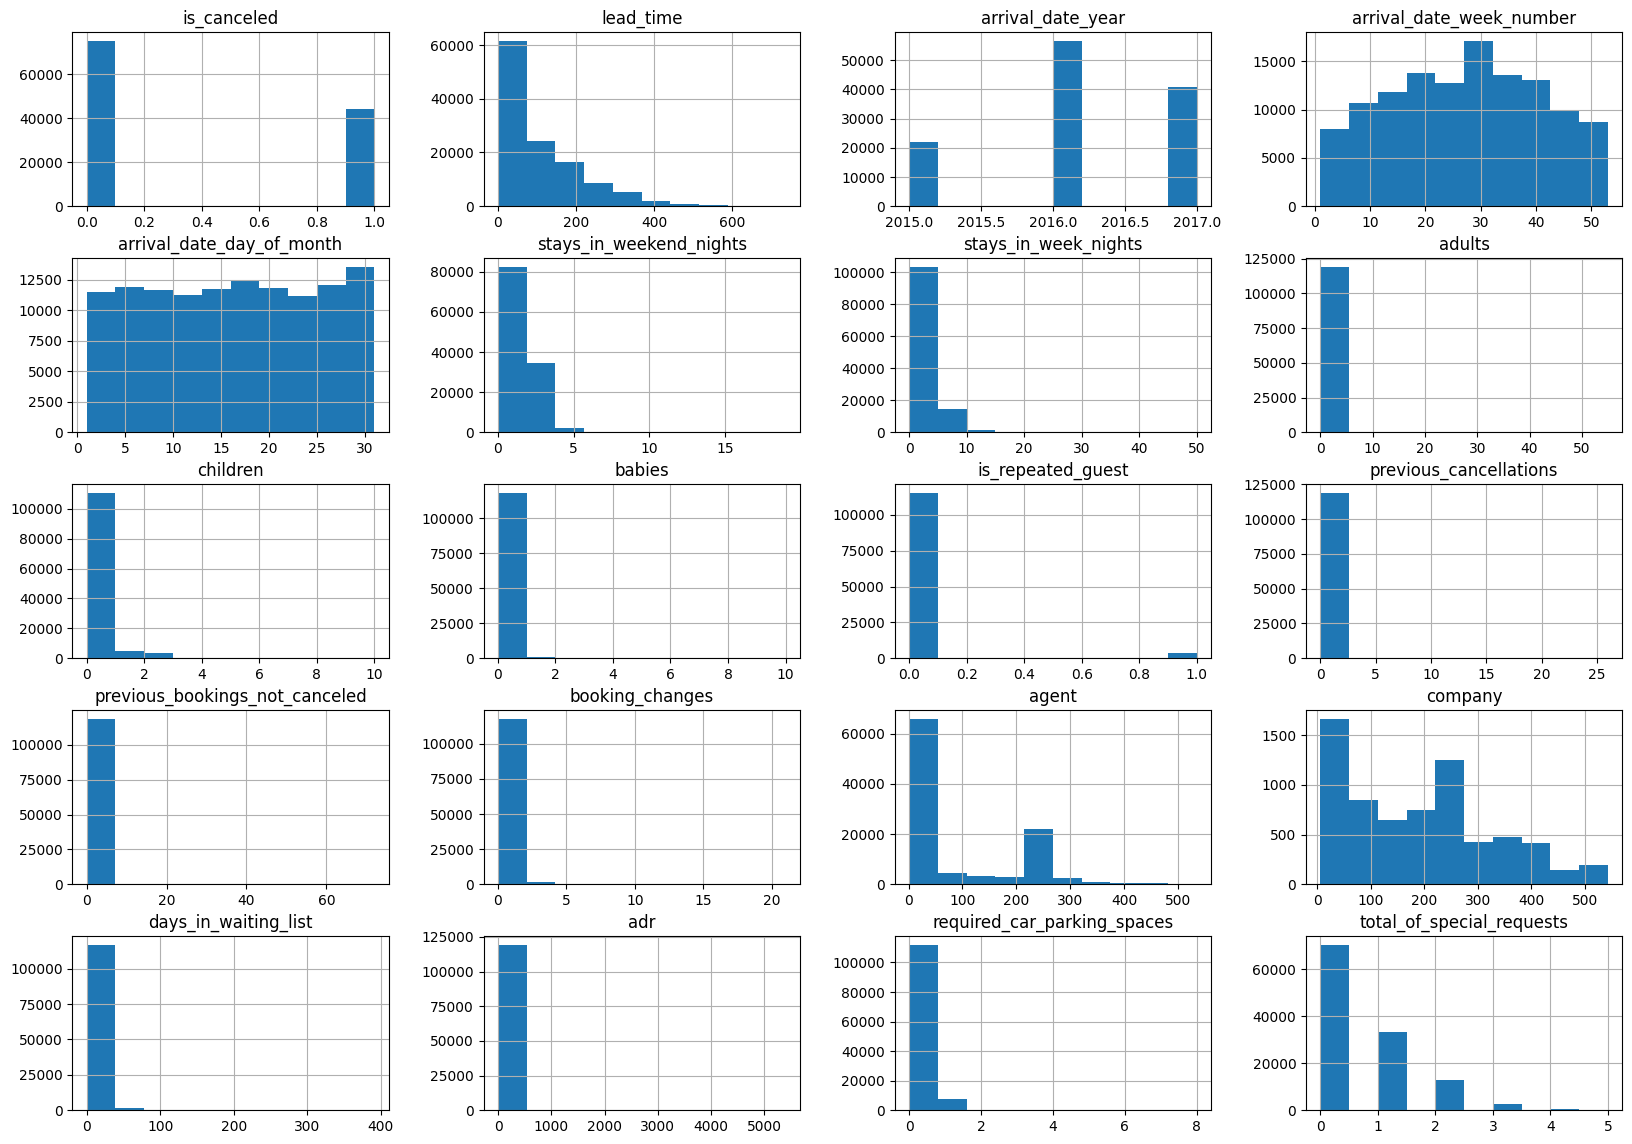

In [36]:
data.hist(figsize=(20,14))
plt.show()

In [37]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [39]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [40]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Dropped both columns because they have alot of missing values. We cant find out for what company they work for. 
Also dropped the missing values from children and country.

Country has 488 rows with the NaN values. 488 rows out of 119390 is negligible hence we will remove them.

In [41]:
columns_to_drop = ['agent', 'company']
data = data.drop(columns=columns_to_drop)
data.dropna(inplace = True)

In [42]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Data analysis and visualizations

### Question 1: Are there specific months where bookings peak?

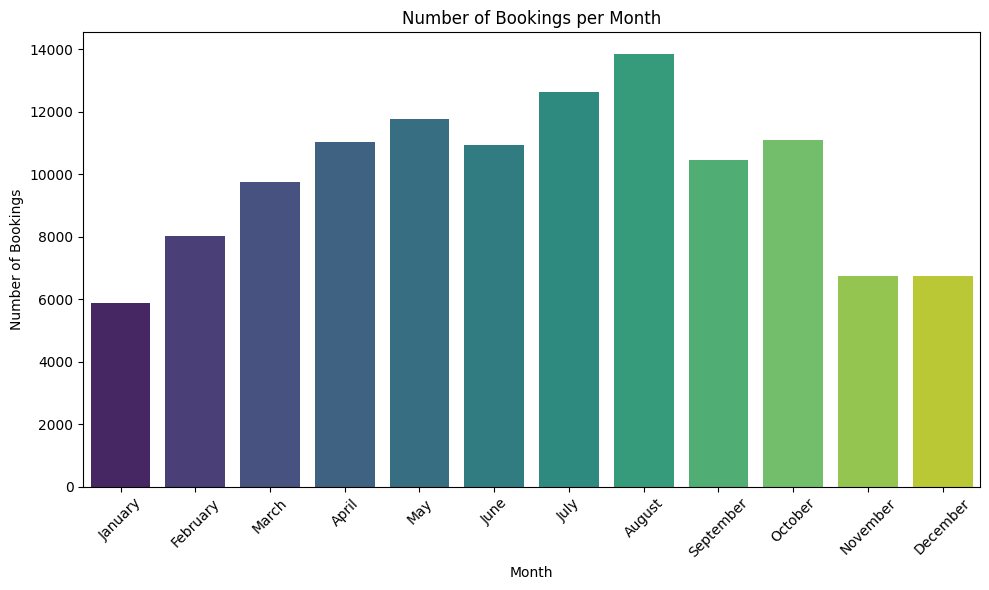

,Month,Number of Bookings
0,January,5874
1,February,8012
2,March,9739
3,April,11045
4,May,11779
5,June,10927
6,July,12628
7,August,13852
8,September,10467
9,October,11095


In [43]:
monthly_bookings = data['arrival_date_month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

monthly_bookings_df = monthly_bookings.reset_index()
monthly_bookings_df.columns = ['Month', 'Number of Bookings']

display(monthly_bookings_df.style.set_caption("Number of Bookings per Month"))

### Analysis:

* Peak months: August and July have the highest number of bookings.

* Lowest Months: January, November and December have the lowest number of bookings.

# Question 2: How do booking trends vary between different types of hotels?

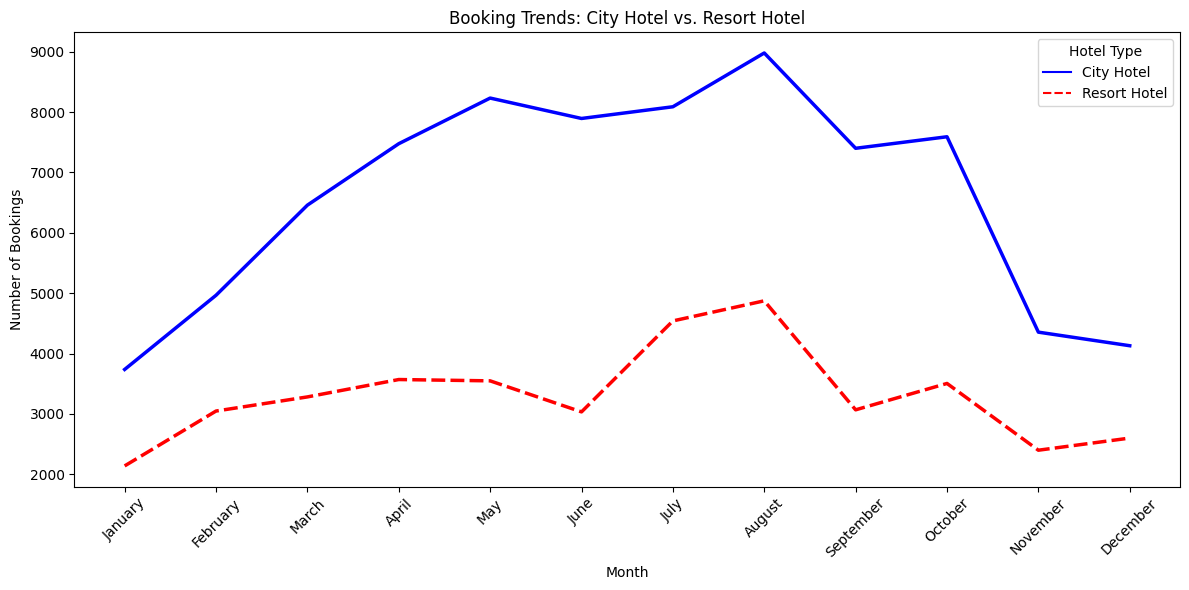

,arrival_date_month,City Hotel,Resort Hotel
0,January,3736,2138
1,February,4965,3047
2,March,6458,3281
3,April,7476,3569
4,May,8232,3547
5,June,7894,3033
6,July,8088,4540
7,August,8979,4873
8,September,7400,3067
9,October,7591,3504


In [44]:
hotel_monthly_bookings = data.groupby(['hotel', 'arrival_date_month']).size().unstack().T.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=hotel_monthly_bookings, palette=['blue', 'red'], linewidth=2.5)
plt.xticks(rotation=45)
plt.title('Booking Trends: City Hotel vs. Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.legend(title='Hotel Type')
plt.show()

hotel_monthly_bookings_df = hotel_monthly_bookings.reset_index()
hotel_monthly_bookings_df.columns.name = None 
hotel_monthly_bookings_df = hotel_monthly_bookings_df.rename_axis(None, axis=1)  

display(hotel_monthly_bookings_df.style.set_caption("Monthly Bookings for Each Hotel Type"))


### Analysis:

* City Hotel got more bookings throughout the year compared to the Resort Hotel.

* Both hotel types experience peak bookings during the summer months (July and August).

* City Hotel also experiences a peak in May, while Resort Hotel does not have a similar peak in may.

# Question 3: How are cancellations and no-shows distributed in the dataset?

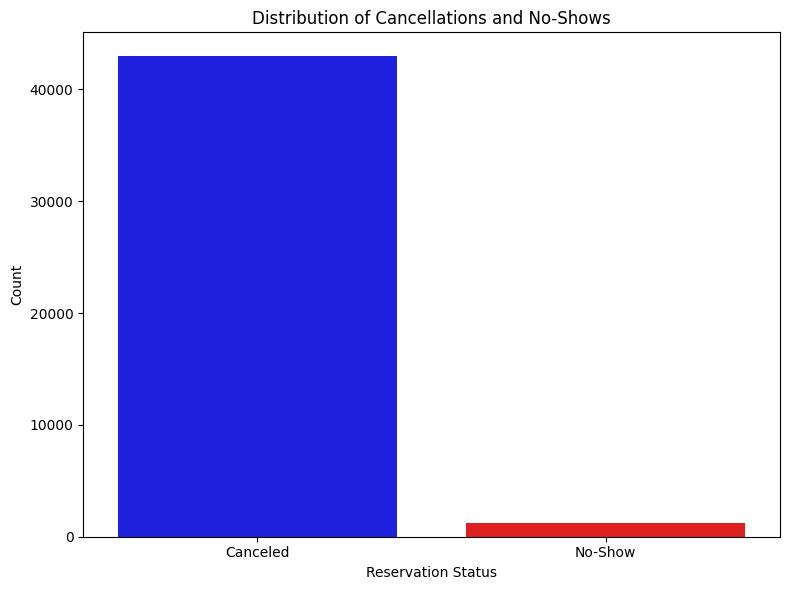

,Reservation Status,Count
0,Canceled,42950
1,No-Show,1203


In [45]:
cancelled_noshow_bookings = data[data['reservation_status'].isin(['Canceled', 'No-Show'])]

status_counts = cancelled_noshow_bookings['reservation_status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette=['blue', 'red'])
plt.title('Distribution of Cancellations and No-Shows')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

status_counts_df = status_counts.reset_index()
status_counts_df.columns = ['Reservation Status', 'Count']

display(status_counts_df.style.set_caption("Distribution of Cancellations and No-Shows"))

### Analysis:

* The bar plot provides a clear visual representation of the number of cancellations versus no-shows

# Question 4: Which countries do most of the guests come from?


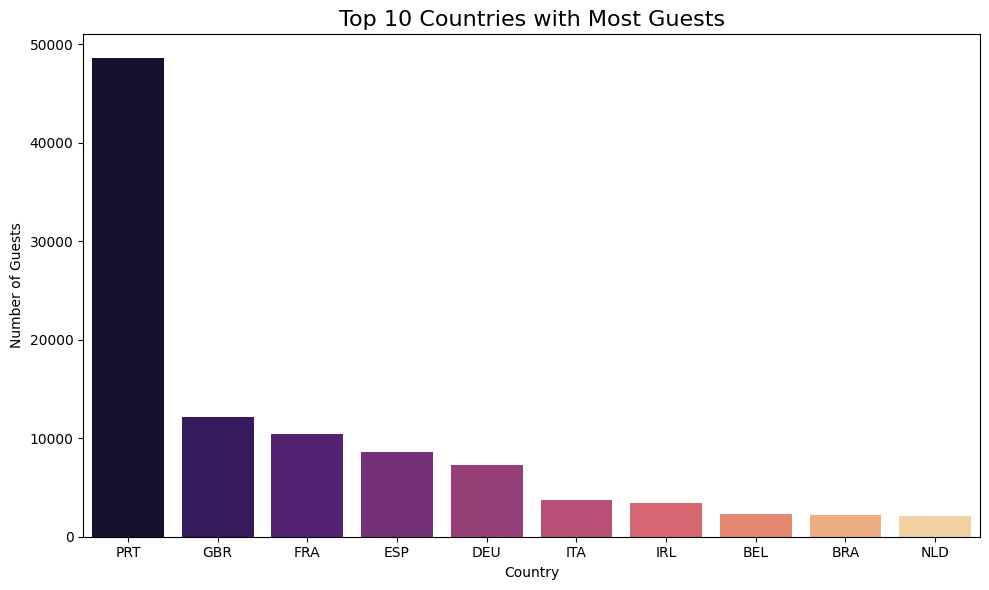

,Country,Number of Guests
0,PRT,48586
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


In [46]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title('Top 10 Countries with Most Guests', fontsize=16, color='black')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.tight_layout()
plt.show()

top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'Number of Guests']
display(top_countries_df.style.set_caption("Top 10 Countries with Most Guests"))

### Analysis:

* The majority of the guests come from Portugal, which is not surprising because the hotels are located in Portugal. The United Kingdom and France also contribute a significant number of guests

# Question 5: How does the average duration of stay vary between different types of hotels?

In [47]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

avg_stay = data.groupby('hotel')['total_nights'].mean().reset_index()

display(avg_stay.style.set_caption("Average Duration of Stay per Hotel Type"))

,hotel,total_nights
0,City Hotel,2.978235
1,Resort Hotel,4.337913


### Analysis:

* Guests stay longer at Resort Hotels compared to City Hotels. This could be due to the nature of the stays (vacation vs. business).

* For Resort Hotels: Understanding that guests prefer longer stays. Explore the option of special offers for extended stays.

* For City Hotels: Considering that stays are shorter, offering flexible check-in/check-out times or short-stay deals might accomodate to the needs of the guests.

# Question 6: How does the average daily rate (ADR) vary across different months? Are there specific periods where hotels can charge a premium due to high demand?

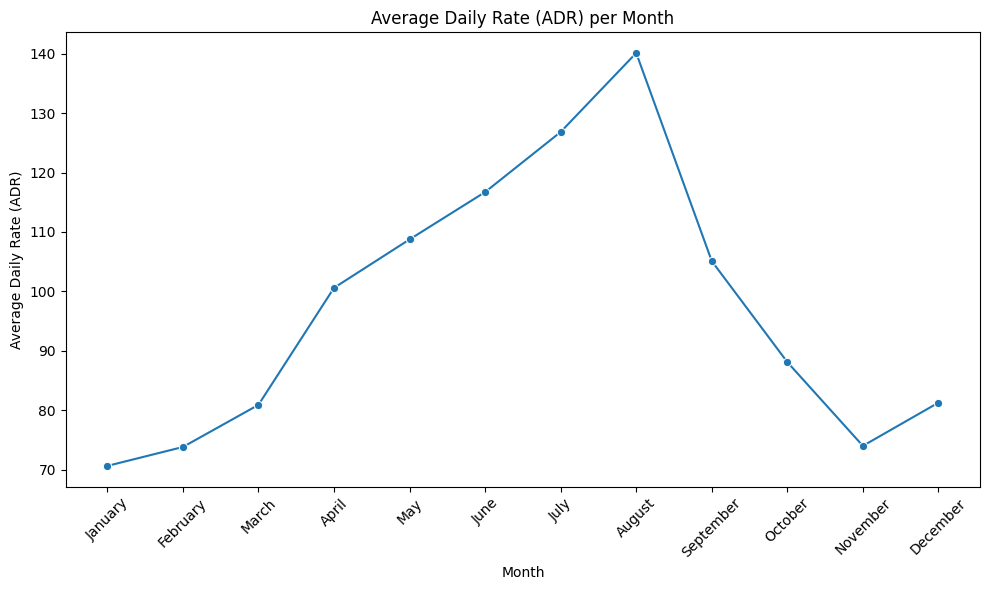

,Month,Average ADR
0,January,70.633827
1,February,73.815056
2,March,80.905435
3,April,100.594148
4,May,108.744701
5,June,116.712740
6,July,126.825223
7,August,140.116106
8,September,105.095653
9,October,88.099087


In [48]:
avg_adr_per_month = data.groupby('arrival_date_month')['adr'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_adr_per_month.index, y=avg_adr_per_month.values, marker='o')
plt.title('Average Daily Rate (ADR) per Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_adr_df = avg_adr_per_month.reset_index()
avg_adr_df.columns = ['Month', 'Average ADR']
avg_adr_df.style.set_caption('Average Daily Rate (ADR) per Month')


### Analysis:


* Peak ADR Months: The ADR is highest in August, followed by July and June. These are the peak months where hotels can charge premium prices due to high demand. Likely due to the summer holiday season.

* Low ADR Months: The ADR is lowest in January, followed by November and February.

# How does the Monthly Cancellation Rate (MCR), vary between different types of hotels throughout the year?

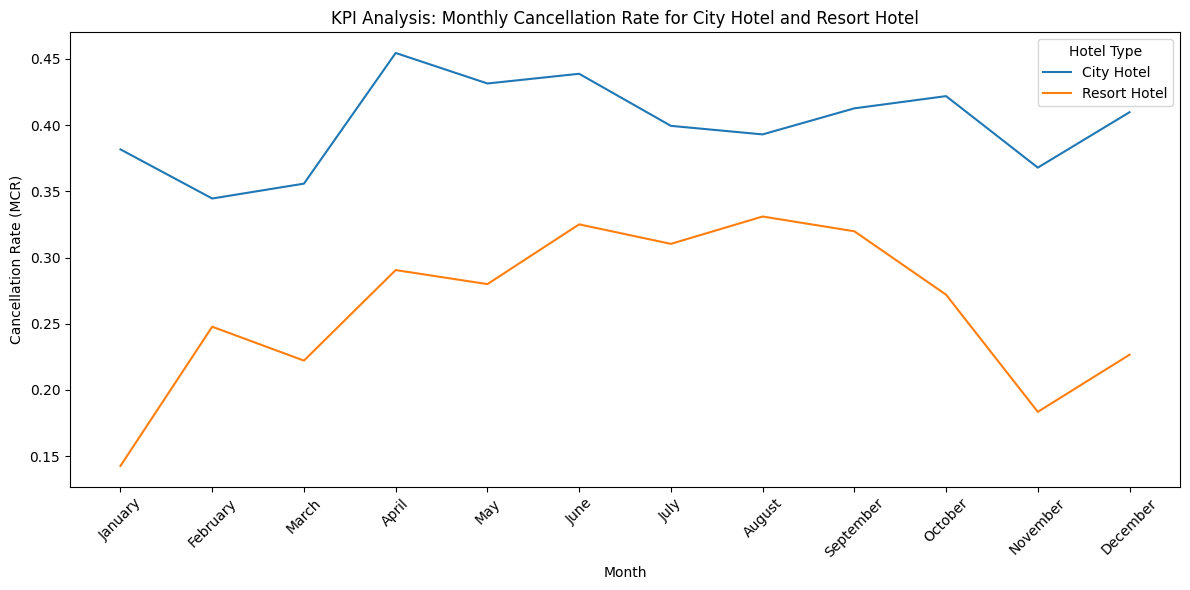

,Hotel Type,Month,Cancellation Rate
4,City Hotel,January,0.38
16,Resort Hotel,January,0.14
3,City Hotel,February,0.34
15,Resort Hotel,February,0.25
7,City Hotel,March,0.36
19,Resort Hotel,March,0.22
0,City Hotel,April,0.45
12,Resort Hotel,April,0.29
20,Resort Hotel,May,0.28
8,City Hotel,May,0.43


In [49]:
cancellations = data[data['reservation_status'] == 'Canceled']

monthly_cancellations = cancellations.groupby(['hotel', 'arrival_date_month']).size().reset_index(name='num_cancellations')

total_bookings = data.groupby(['hotel', 'arrival_date_month']).size().reset_index(name='total_bookings')

merged_data = pd.merge(total_bookings, monthly_cancellations, on=['hotel', 'arrival_date_month'])

merged_data['cancellation_rate'] = merged_data['num_cancellations'] / merged_data['total_bookings']

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
merged_data['arrival_date_month'] = pd.Categorical(merged_data['arrival_date_month'], categories=months_order, ordered=True)
merged_data = merged_data.sort_values('arrival_date_month')

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='arrival_date_month', y='cancellation_rate', hue='hotel')
plt.title('KPI Analysis: Monthly Cancellation Rate for City Hotel and Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (MCR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Hotel Type')
plt.show()

cancellation_rate_df = merged_data[['hotel', 'arrival_date_month', 'cancellation_rate']].copy()
cancellation_rate_df.columns = ['Hotel Type', 'Month', 'Cancellation Rate']
cancellation_rate_df['Cancellation Rate'] = cancellation_rate_df['Cancellation Rate'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
display(cancellation_rate_df.style.set_caption('KPI Table: Monthly Cancellation Rate for Each Hotel Type'))

### Analysis:

* The cancellation rate for the City Hotel peaks during the summer months (June, July, and August), indicating a higher frequency of cancellations during the summer.
* The City Hotel generally has a higher cancellation rate compared to the Resort Hotel across all months.
* The Resort Hotel experiences relatively lower cancellation rates during the winter months as well.

### Conclusion:

* The higher cancellation rates during the summer months for both hotel types suggest that this period is particularly volatile and might benefit from targeted strategies, such as flexible booking options
*  Engaging with customers through communication and offering incentives might reduce the likelihood of cancellations during peak periods.

# Hypothesis: Is there a statistically significant difference in the average daily rate (ADR) between city hotels and resort hotels?

* Null Hypothesis (H0): The average price of city hotels is equal to the average price of resort hotels.
* Alternative Hypothesis (H1): The average price of city hotels is not equal to the average price of resort hotels.

In [50]:
adr_city_hotel = data[data['hotel'] == 'City Hotel']['adr'].dropna()
adr_resort_hotel = data[data['hotel'] == 'Resort Hotel']['adr'].dropna()


t_stat, p_value = ttest_ind(adr_city_hotel, adr_resort_hotel, equal_var=False)


t_test_results_df = pd.DataFrame({
    'Statistic': ['t-statistic', 'p-value'],
    'Value': [t_stat, p_value]
})

t_test_results_df.style.set_caption('T-Test Results')
display(t_test_results_df)

,Statistic,Value
0,t-statistic,2.887088e+01
1,p-value,4.898737e-182


### Analysis:

The p-value is extremely close to 0, which is much smaller than the common significance level of 0.05. This means that we can reject the null hypothesis (H0) in favor of the alternative hypothesis (H1).

### Conclusion:
There is a statistically significant difference between the average price per night at city hotels and the average price per night at resort hotels. Given the t-statistic value, it suggests that the average price of city hotels is higher than that of resort hotels.

# Predict whether a booking will be canceled or not.

In [52]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

numerical_cols.remove('is_canceled')

X = data[numerical_cols]
y = data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train.fillna(0), y_train)

y_pred = clf.predict(X_test.fillna(0))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

display("Model Performance Metrics:")
display(f"Accuracy:  {accuracy:.2%}")
display(f"Precision: {precision:.2%}")
display(f"Recall:    {recall:.2%}")
display(f"F1 Score:  {f1:.2%}")

'Model Performance Metrics:'

'Accuracy:  84.57%'

'Precision: 84.95%'

'Recall:    71.59%'

'F1 Score:  77.70%'

### Conclusion:

* The model demonstrates an accuracy of 84.57% in predicting booking cancellations.
* The model performs well in predicting whether a booking will be cancelled or not, with a good balance between precision and recall.
* Insights from the model could guide the development of strategies to reduce cancellations, thereby improving customer experience and loyalty.